EDA

In [3]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import nltk

In [6]:
#Load data
df = pd.read_csv('maindb.csv')

In [7]:
df.head()

,Unnamed: 0,user_id,playtime_forever,title,id,developer,release_year,Action,Adventure,Animation &amp; Modeling,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,0,76561197970982479,6.0,Counter-Strike,10.0,Valve,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,js41637,0.0,Counter-Strike,10.0,Valve,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Riot-Punch,0.0,Counter-Strike,10.0,Valve,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,doctr,93.0,Counter-Strike,10.0,Valve,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,corrupted_soul,108.0,Counter-Strike,10.0,Valve,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Inicial exploration
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0            user_id  playtime_forever           title    id  \
0           0  76561197970982479               6.0  Counter-Strike  10.0   
1           1            js41637               0.0  Counter-Strike  10.0   
2           2         Riot-Punch               0.0  Counter-Strike  10.0   
3           3              doctr              93.0  Counter-Strike  10.0   
4           4     corrupted_soul             108.0  Counter-Strike  10.0   

  developer  release_year  Action  Adventure  Animation &amp; Modeling  ...  \
0     Valve        2000.0     1.0        0.0                       0.0  ...   
1     Valve        2000.0     1.0        0.0                       0.0  ...   
2     Valve        2000.0     1.0        0.0                       0.0  ...   
3     Valve        2000.0     1.0        0.0                       0.0  ...   
4     Valve        2000.0     1.0        0.0                       0.0  ...   

   Photo Editing  RPG  Racing  Simulation  Software Training  Sports

In [9]:
#Cheking nulls
print(df.isnull().sum())


Unnamed: 0                   0
user_id                      0
playtime_forever             0
title                        0
id                           0
developer                    0
release_year                 0
Action                       0
Adventure                    0
Animation &amp; Modeling     0
Audio Production             0
Casual                       0
Design &amp; Illustration    0
Early Access                 0
Education                    0
Free to Play                 0
Indie                        0
Massively Multiplayer        0
Photo Editing                0
RPG                          0
Racing                       0
Simulation                   0
Software Training            0
Sports                       0
Strategy                     0
Utilities                    0
Video Production             0
Web Publishing               0
dtype: int64


In [10]:
#Duplicates
print(df.duplicated().sum())

0


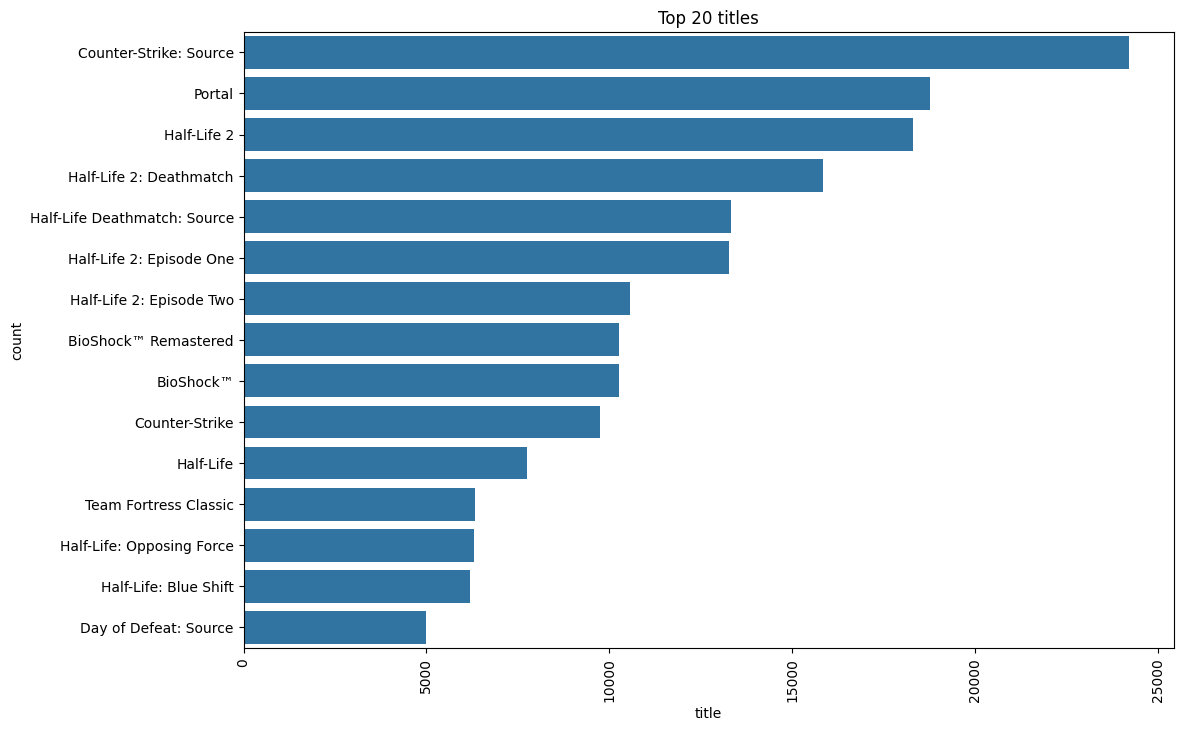

In [17]:
#Top 20 titles
top_titles = df['title'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.xlabel('title')
plt.ylabel('count')
plt.title('Top 20 titles')
plt.xticks(rotation=90)
plt.show()

In [13]:
#Create a list with numeric variables to make next table
df_num= df.select_dtypes(include = (int,float))
df_num.drop(columns=['Action', 'Adventure',
       'Audio Production', 'Casual', 'Design &amp; Illustration',
       'Early Access', 'Education', 'Free to Play', 'Indie', 'Animation &amp; Modeling',
       'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
       'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing'], inplace=True)

<Axes: >

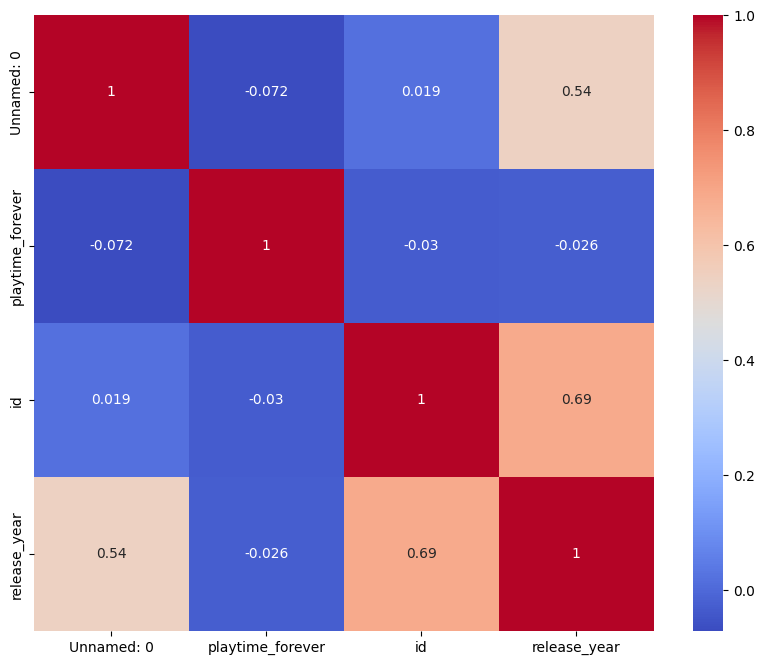

In [16]:
#correlation matrix
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

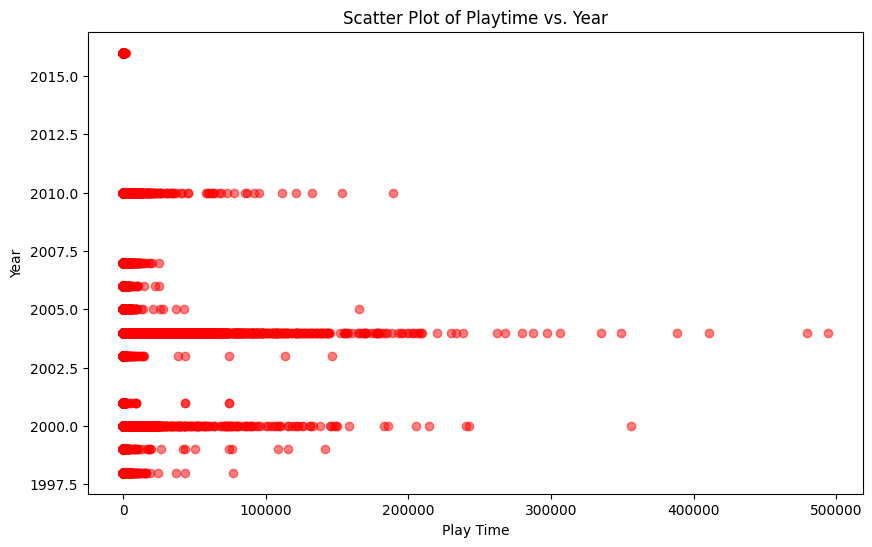

In [21]:
#Scatter Plot
plt.figure(figsize=(10, 6))

plt.scatter(df_num['playtime_forever'], df_num['release_year'], color='Red', alpha=0.5)

plt.title('Scatter Plot of Playtime vs. Year')
plt.xlabel('Play Time')
plt.ylabel('Year');

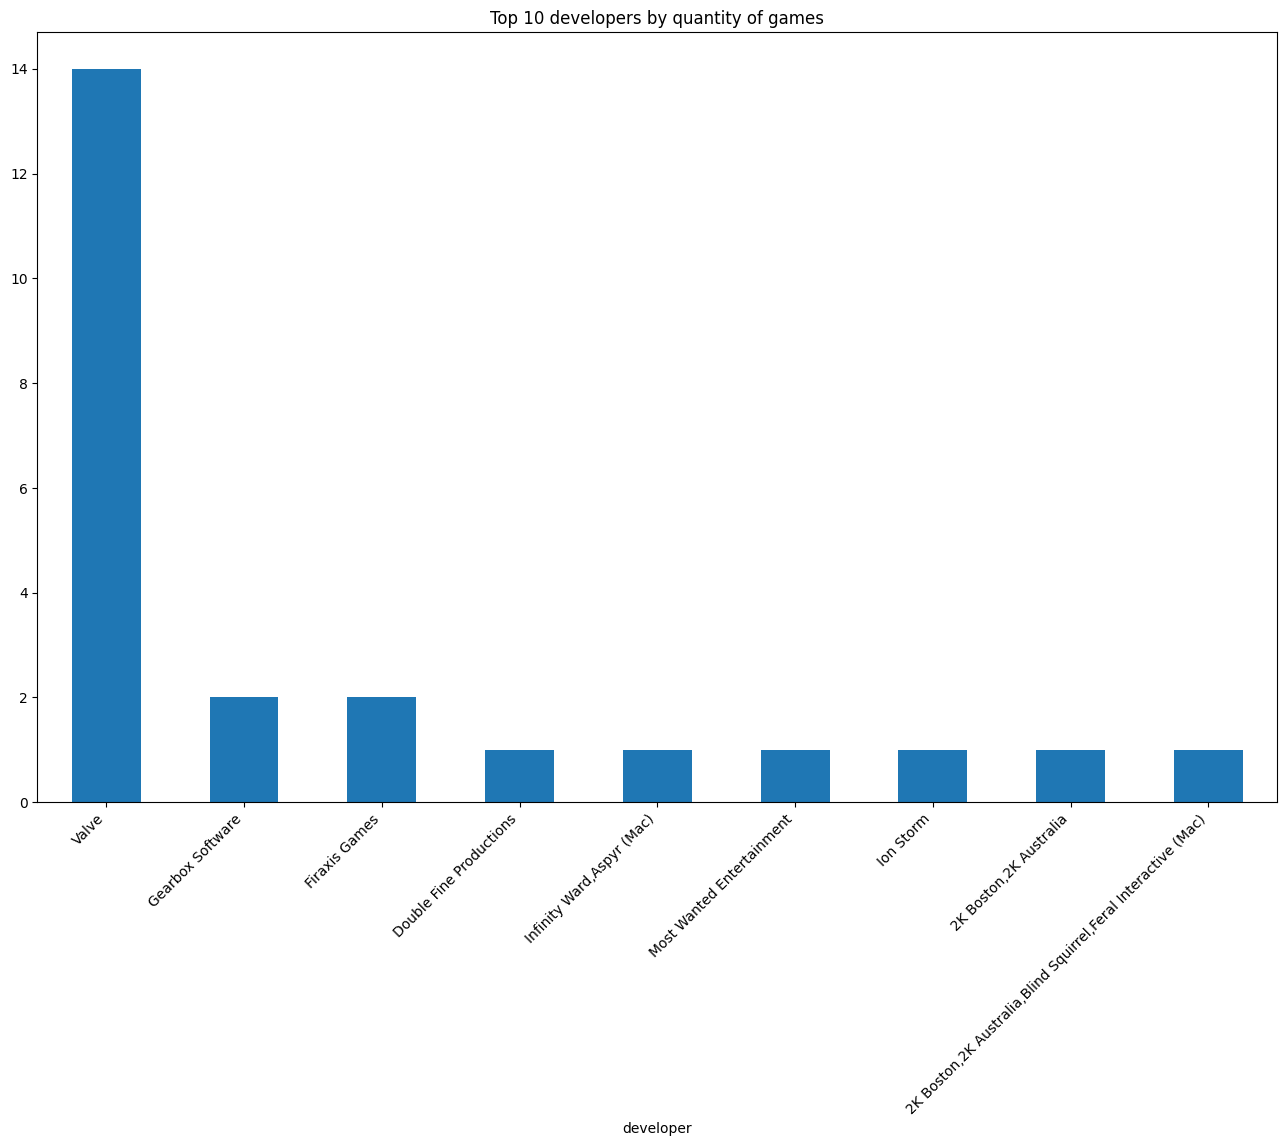

In [25]:
plt.figure(figsize=(16,10))
df_developers = df[['developer','id']].drop_duplicates()
conteo_developer = df_developers['developer'].value_counts()
conteo_developer[:10].plot(kind='bar')
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 developers by quantity of games')
plt.show()

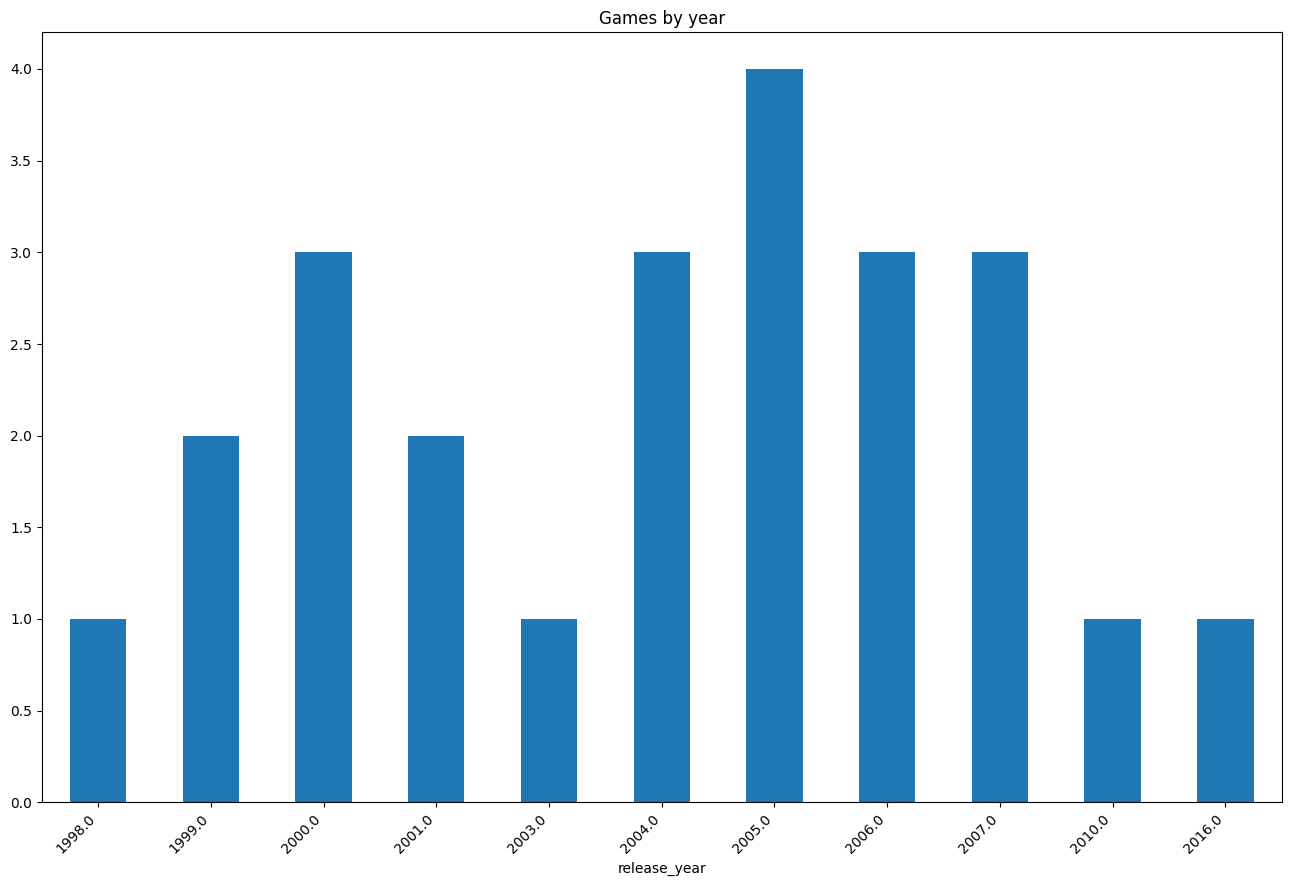

In [28]:
plt.figure(figsize=(16,10))
df_years = df[['release_year','id']].drop_duplicates()
conteo_year = df_years['release_year'].value_counts().sort_index()
conteo_year.plot(kind='bar')
plt.xticks(rotation=45,ha='right')
plt.title('Games by year')
plt.show()